# Credit Card Fraud #
### SVMs ###

## Packages ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

## Data Exploration ##

### Loading the Data Set ###

In [27]:
cc_data = pd.read_csv("creditcard.csv")

In [3]:
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Checking for Missing Values ###

In [4]:
cc_data.isnull().sum()[cc_data.isnull().sum() > 0]

Series([], dtype: int64)

Awesome! There are no missing values.

### Variable Distribution ###

In [5]:
cc_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### V1-V28 ####

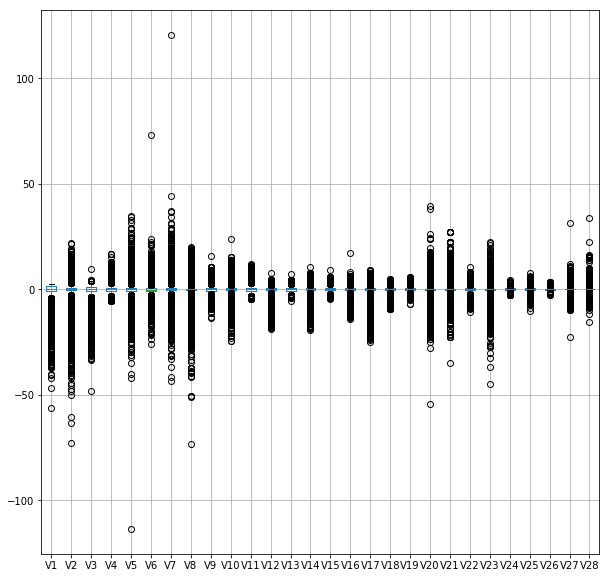

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
cc_data.drop(['Amount', 'Time', 'Class'], axis = 1).boxplot()

There seem to be a lot of outliers, some extreme in the V1-V28 variables. Depending on the significance of those variables, they may need to be removed.

#### Time ####

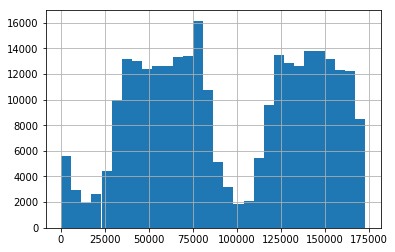

In [7]:
cc_data['Time'].hist(bins = 30)

There is nothing too interesting with the Time data. It is logical that there are periods of time with more transactions (daytime), with less during the night time.

#### Amount ####

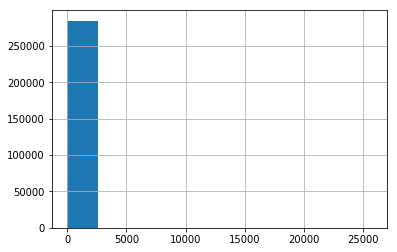

In [9]:
cc_data['Amount'].hist()

The amounts are extremely skewed to the right.

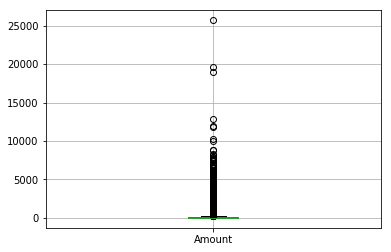

In [8]:
cc_data.boxplot(column = 'Amount')

As expected, the vast majority of amounts are very low, with many outliers. The data will need to be transformed, not only to reduce the extreme outliers, but to be able to work with the normalized PCA values, V1-V28.

#### Amount over Time ####

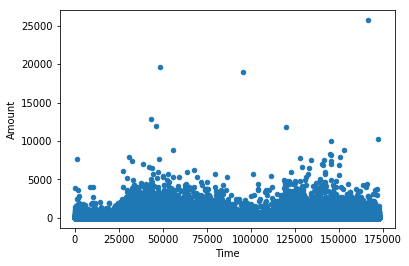

In [10]:
cc_data.plot(x = 'Time', y = 'Amount', kind = 'scatter')

#### Class ####

Non-Fraudulent Frequency: 0.9983


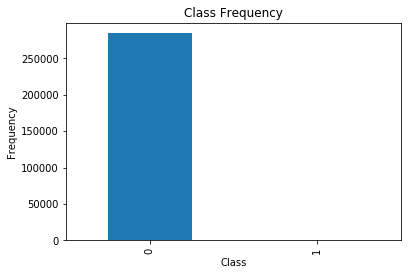

In [11]:
cc_data['Class'].value_counts().plot(kind = 'bar')
plt.title("Class Frequency")
plt.ylabel("Frequency")
plt.xlabel("Class")

print("Non-Fraudulent Frequency:", round(cc_data['Class'].value_counts()[0] / len(cc_data['Class']), 4))

The class variable is extremely unbalanced. Only 0.17% of transactions were fraudulent. While this makes sense (thankfully), we will need to perform undersampling with our training set.

### Variable Correlation ###

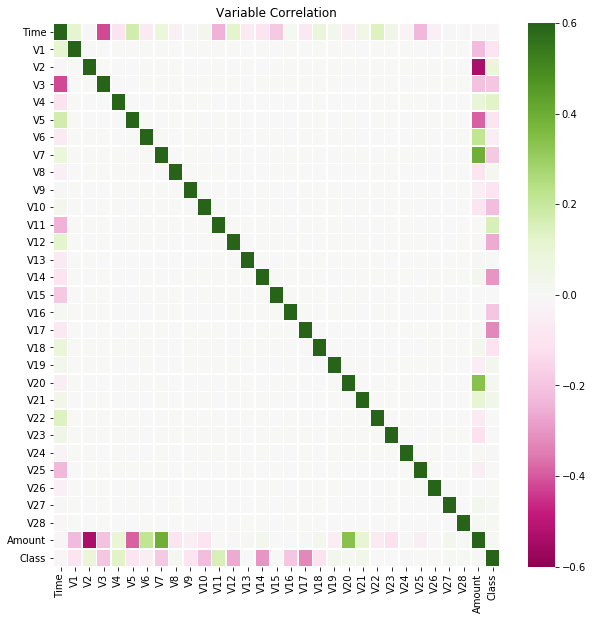

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
corr = cc_data.corr()
corr_heatmap = sns.heatmap(corr, linewidths = .5, vmin = -0.6, vmax = 0.6, cmap="PiYG")
corr_heatmap.set_title('Variable Correlation')
plt.show()

The PCA transformed variables V1-V28 aren't very correlated with each other, but many are correlated with Time, Amount, and Class.

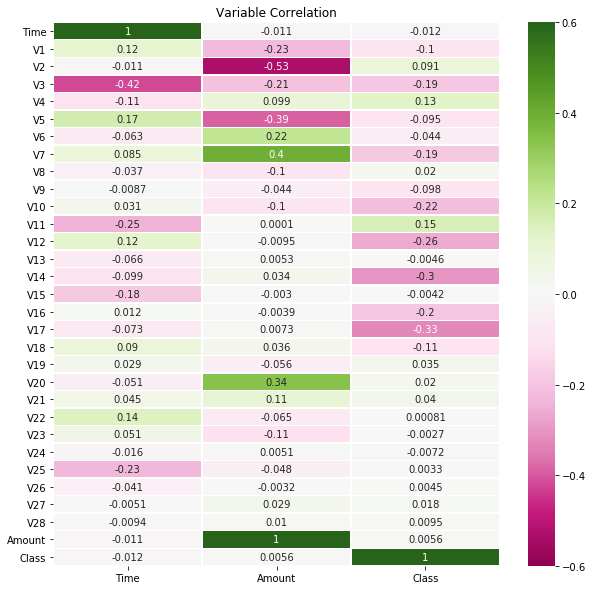

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
corr = cc_data.corr()
corr = corr[['Time', 'Amount', 'Class']] # potentially correlated variables
corr_heatmap = sns.heatmap(corr, linewidths = .5, annot = True, vmin = -0.6, vmax = 0.6, cmap="PiYG")
corr_heatmap.set_title('Variable Correlation')
plt.show()

#### Mean Transaction Amount vs Class ####

Text(0.5, 0, 'Class')

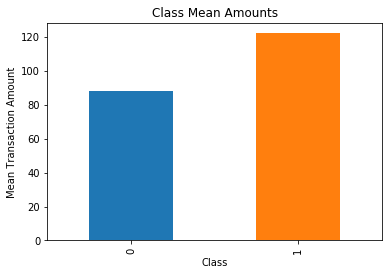

In [12]:
cc_data.groupby('Class').mean()['Amount'].plot(kind = 'bar')
plt.title("Class Mean Amounts")
plt.ylabel("Mean Transaction Amount")
plt.xlabel("Class")

Even though transaction amount isn't a great predictor for whether or not the transaction was fraudulent, somewhat unsurprisingly, the mean transaction amount for fraudulent transactions was higher than non-fraudulent transactions. Instead of thieves purchasing small things, such as coffees or groceries, they may be purchasing much more expensive things, such as TVs, etc.

## Transforming Data ##

Due to the imbalanced nature of the class variable, the data will need to be transformed in order to really get a good idea of the correlations between variables and to help us build a model. To mould the data, I will perform undersampling, where all of the minority class (fraudulent transactions) will be used alongside an equal number of non-traudulent transactions.

In [29]:
cc_data['Amount_scaled'] = RobustScaler().fit_transform(cc_data['Amount'].values.reshape(-1,1))
cc_data = cc_data.drop(['Time', 'Amount'], axis = 1)

In [30]:
frauds = cc_data[cc_data['Class'] == 1]
frauds_indices = frauds.index

nonfraud_indices = cc_data.index.delete(frauds_indices)
random_nonfraud = np.random.choice(nonfraud_indices, len(frauds_indices))

In [31]:
cc_data_us = pd.concat([frauds, cc_data.iloc[random_nonfraud]])
cc_data_us.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.307413
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,7.084469
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,3.045204
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,0.517013
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.293440


Undersampled Non-Fraudulent Frequency: 0.5


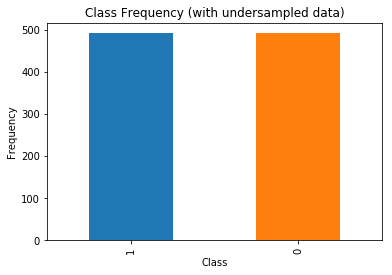

In [18]:
cc_data_us['Class'].value_counts().plot(kind = 'bar')
plt.title("Class Frequency (with undersampled data)")
plt.ylabel("Frequency")
plt.xlabel("Class")

print("Undersampled Non-Fraudulent Frequency:", round(cc_data_us['Class'].value_counts()[0] / len(cc_data_us['Class']), 4))

### Re-Examing Variable Correlation ###

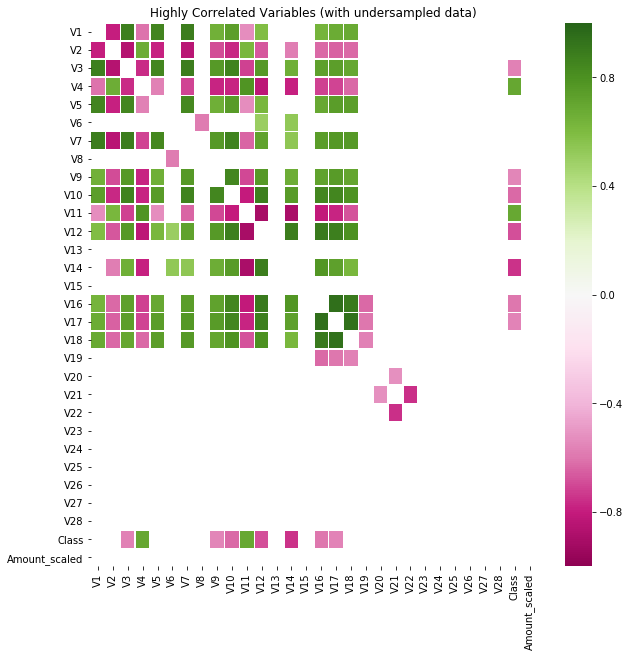

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
corr = cc_data_us.corr()
high_corr = corr[(corr > 0.5) & (corr < 1) | (corr < -0.5)]

corr_heatmap = sns.heatmap(high_corr, linewidths = .5, vmin = -1, vmax = 1, cmap="PiYG")
corr_heatmap.set_title('Highly Correlated Variables (with undersampled data)')
plt.show()

It is now more evident that there is correlation between the PCA transformed variables, especially now that fraudulent transactions are more heavily weighted.

### Checking for Extreme Outliers ###
For variables highly correlated with the class, I checked for extreme outliers.

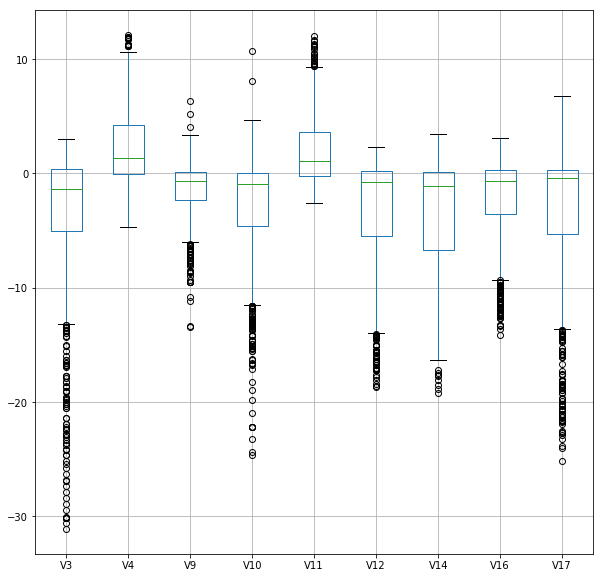

In [20]:
fig, ax = plt.subplots(figsize=(10,10))

cc_data_us_hc = cc_data_us[high_corr['Class'].dropna().index]
cc_data_us_hc.boxplot()

While it is clear that there are some extreme outliers, I have left them in at this time. Many of the points are very close to each other and it's hard to draw a boundary between outlier and extreme outlier in most cases.

## Training the Data ##

### Finding Optimal C value for SVM ###

In [21]:
import warnings
warnings.filterwarnings("ignore")

X = cc_data_us.drop('Class', axis = 1)
y = cc_data_us['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


C_vals = [0.01, 0.1, 1, 10, 100]

for c in C_vals:
    fit = SVC().fit(X_train, y_train)
    score = cross_val_score(SVC(C = c), X_train, y_train, cv = 10)
    print('Training Score: C = ', c, ': ', round(score.mean(), 4))

Training Score: C =  0.01 :  0.8894
Training Score: C =  0.1 :  0.8895
Training Score: C =  1 :  0.9175
Training Score: C =  10 :  0.9213
Training Score: C =  100 :  0.9123


In [22]:
C_vals = [0.5, 1, 2, 3, 4, 5]

for c in C_vals:
    fit = SVC().fit(X_train, y_train)
    score = cross_val_score(SVC(C = c), X_train, y_train, cv = 10)
    print('Training Score: C = ', c, ': ', round(score.mean(), 4))

Training Score: C =  0.5 :  0.9112
Training Score: C =  1 :  0.9175
Training Score: C =  2 :  0.9226
Training Score: C =  3 :  0.929
Training Score: C =  4 :  0.9289
Training Score: C =  5 :  0.9302


### Performance on Undersampled Set ###

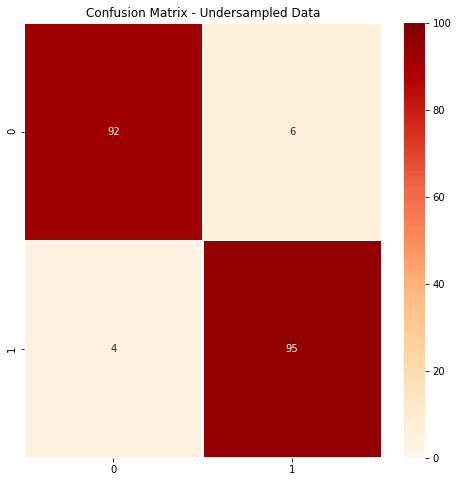

Recall: 0.9595959595959596


In [23]:
best_fit = SVC(C = 2)

best_fit.fit(X_train, y_train.values.ravel())
y_pred = best_fit.predict(X_test.values)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
cm_heatmap = sns.heatmap(cm, annot = True, linewidths = .5, vmin = 0, vmax = 100, cmap="OrRd", fmt = "g")
cm_heatmap.set_title('Confusion Matrix - Undersampled Data')
plt.show()

print("Recall:", cm[1,1]/(cm[1,0]+cm[1,1]))

### Performance on Entire Set ###

In [32]:
X = cc_data.drop('Class', axis = 1)
y = cc_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

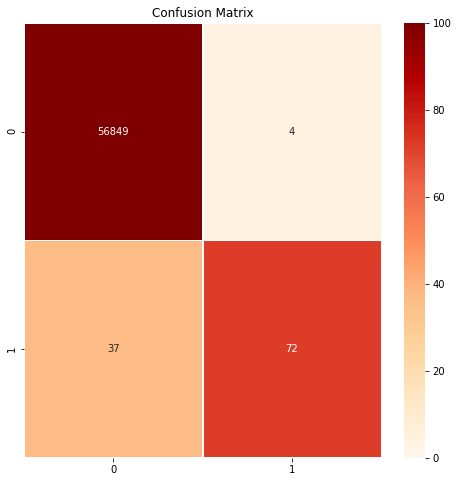

Recall: 0.6605504587155964


In [33]:
best_fit = SVC(C = 2)

best_fit.fit(X_train, y_train.values.ravel())
y_pred = best_fit.predict(X_test.values)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
cm_heatmap = sns.heatmap(cm, annot = True, linewidths = .5, vmin = 0, vmax = 100, cmap="OrRd", fmt = "g")
cm_heatmap.set_title('Confusion Matrix')
plt.show()

print("Recall:", cm[1,1]/(cm[1,0]+cm[1,1]))